### import financial data from number of available sources
### here we will load google closing price history

In [25]:
#loading google closing price history
import pandas as pd
from pandas_datareader import data  #importing financial data from number of available source
goog = data.DataReader('GOOG', start='2004',end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [9]:
goog = ['Close']

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


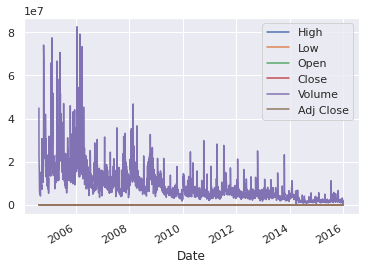

In [27]:
goog.plot();


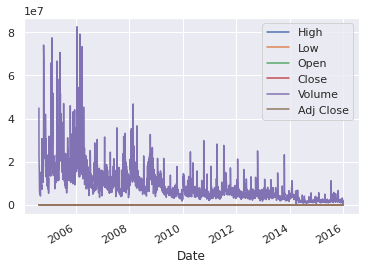

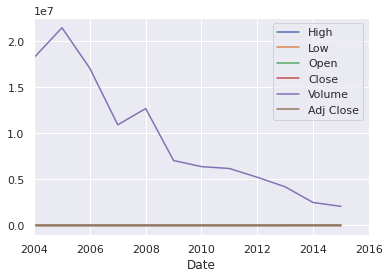

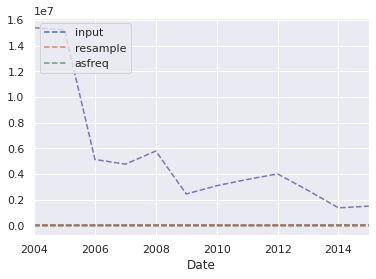

In [31]:
goog.plot(alpha=1, style='-')
goog.resample('BA').mean().plot(style='-')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

### Notice the difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year.

### Time -shifts

### shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.Here we will both shift() and tshift() by 900 days

/tmp/ipykernel_6792/2361333902.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


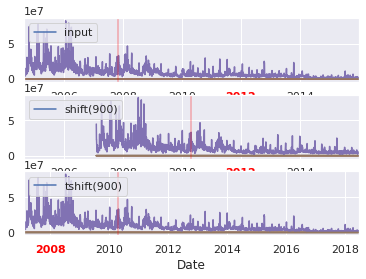

In [37]:
fig, ax = plt.subplots(3,sharey =True)
#applying a frequency to the data
goog = goog.asfreq('D',method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])


# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');


###  let's compute a one year  return on investment on our dataset

/tmp/ipykernel_6792/2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


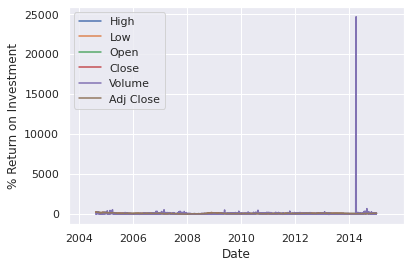

In [38]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### This helps us to see the overall trend in Yahoo stocks; Most profitable time to invest have been in 2014